In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv

In [257]:
# read csvs
sales_data = pd.read_csv('sales_data.csv')
outlet_data = pd.read_csv('outlets_data.csv')
product_data = pd.read_csv('product_data.csv')
week_data = pd.read_csv('week_data.csv')
freezer_data = pd.read_csv('freezer_data.csv')

In [19]:
sales_data.head()

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0


In [20]:
product_data.head()

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100


In [53]:
week_data

,week,Start Date,End Date
0,1,1/2/2023,1/8/2023
1,2,1/9/2023,1/15/2023
2,3,1/16/2023,1/22/2023
3,4,1/23/2023,1/29/2023
4,5,1/30/2023,2/5/2023
5,6,2/6/2023,2/12/2023
6,7,2/13/2023,2/19/2023
7,8,2/20/2023,2/26/2023
8,9,2/27/2023,3/5/2023
9,10,3/6/2023,3/12/2023


In [32]:
# Combining sales and products dataframes
sales_product_data = pd.merge(sales_data,product_data,how='left',on='pid')
sales_product_data.head()

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,Vanilla Mini Cone,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,Chocolate Petite Bar,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,Strawberry Tiny Cup,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,Mint Bite-size Pop,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,Butter Pecan Small Stick,100


In [28]:
sum(sales_product_data.product_name_x == sales_product_data.product_name_y)

81000

In [33]:
sales_product_data.drop('product_name_y',axis=1,inplace=True)
sales_product_data.head()

,Outlet_ID,week,pid,product_name_x,no_units,volume,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100


In [54]:
# Combining sales products and week
sales_product_week_data = pd.merge(sales_product_data,week_data,how='left',on='week')
sales_product_week_data.head(10)

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,1/2/2023,1/8/2023
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,1/2/2023,1/8/2023
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,1/2/2023,1/8/2023
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,1/2/2023,1/8/2023
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,1/2/2023,1/8/2023
5,ID7203,2,IP1,Vanilla Mini Cone,644.0,0.2,100,1/9/2023,1/15/2023
6,ID7203,2,IP2,Chocolate Petite Bar,265.0,0.2,90,1/9/2023,1/15/2023
7,ID7203,2,IP3,Strawberry Tiny Cup,1106.0,0.2,110,1/9/2023,1/15/2023
8,ID7203,2,IP4,Mint Bite-size Pop,387.0,0.2,100,1/9/2023,1/15/2023
9,ID7203,3,IP1,Vanilla Mini Cone,600.0,0.2,100,1/16/2023,1/22/2023


In [58]:
# check for duplicates
duplicate = sales_product_week_data[sales_product_week_data.duplicated(['Outlet_ID','week','pid'])]
duplicate

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date
5507,ID5859,1,IP1,Vanilla Mini Cone,1146.0,0.2,100,1/2/2023,1/8/2023
5508,ID5859,1,IP2,Chocolate Petite Bar,890.0,0.2,90,1/2/2023,1/8/2023
5509,ID5859,1,IP3,Strawberry Tiny Cup,755.0,0.2,110,1/2/2023,1/8/2023
5511,ID5859,1,IP5,Butter Pecan Small Stick,900.0,0.2,100,1/2/2023,1/8/2023
5513,ID5859,2,IP2,Chocolate Petite Bar,133.0,0.2,90,1/9/2023,1/15/2023
...,...,...,...,...,...,...,...,...,...
79577,ID7029,12,IP5,Butter Pecan Small Stick,454.0,0.2,100,3/20/2023,3/26/2023
79578,ID7029,12,BP1,Chocolate Fudge Big Scoop,43.0,1.0,1200,3/20/2023,3/26/2023
79579,ID7029,12,BP3,Mint Chocolate Chip Family Pack,77.0,1.0,1150,3/20/2023,3/26/2023
79580,ID7029,12,BP4,Rocky Road Mega Tub,67.0,1.0,1000,3/20/2023,3/26/2023


In [63]:
sales_product_week_data.loc[(sales_product_week_data.Outlet_ID=='ID5859') & (sales_product_week_data.week==1)]

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date
5454,ID5859,1,IP1,Vanilla Mini Cone,876.0,0.2,100,1/2/2023,1/8/2023
5455,ID5859,1,IP2,Chocolate Petite Bar,556.0,0.2,90,1/2/2023,1/8/2023
5456,ID5859,1,IP3,Strawberry Tiny Cup,532.0,0.2,110,1/2/2023,1/8/2023
5457,ID5859,1,IP5,Butter Pecan Small Stick,936.0,0.2,100,1/2/2023,1/8/2023
5507,ID5859,1,IP1,Vanilla Mini Cone,1146.0,0.2,100,1/2/2023,1/8/2023
5508,ID5859,1,IP2,Chocolate Petite Bar,890.0,0.2,90,1/2/2023,1/8/2023
5509,ID5859,1,IP3,Strawberry Tiny Cup,755.0,0.2,110,1/2/2023,1/8/2023
5510,ID5859,1,IP4,Mint Bite-size Pop,249.0,0.2,100,1/2/2023,1/8/2023
5511,ID5859,1,IP5,Butter Pecan Small Stick,900.0,0.2,100,1/2/2023,1/8/2023


In [66]:
# create new features

sales_product_week_data['total_volume'] = sales_product_week_data['no_units']*sales_product_week_data['volume']
sales_product_week_data['earning'] = sales_product_week_data['no_units']*sales_product_week_data['price']
sales_product_week_data.head(10)

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date,total_volume,earning
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,1/2/2023,1/8/2023,174.8,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,1/2/2023,1/8/2023,21.0,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,1/2/2023,1/8/2023,239.6,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,1/2/2023,1/8/2023,100.4,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,1/2/2023,1/8/2023,142.0,71000.0
5,ID7203,2,IP1,Vanilla Mini Cone,644.0,0.2,100,1/9/2023,1/15/2023,128.8,64400.0
6,ID7203,2,IP2,Chocolate Petite Bar,265.0,0.2,90,1/9/2023,1/15/2023,53.0,23850.0
7,ID7203,2,IP3,Strawberry Tiny Cup,1106.0,0.2,110,1/9/2023,1/15/2023,221.2,121660.0
8,ID7203,2,IP4,Mint Bite-size Pop,387.0,0.2,100,1/9/2023,1/15/2023,77.4,38700.0
9,ID7203,3,IP1,Vanilla Mini Cone,600.0,0.2,100,1/16/2023,1/22/2023,120.0,60000.0


In [43]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [47]:
# checking for duplicates in outlets and remove (keep the last record)
outlet_data.Outlet_ID.nunique()

951

In [45]:
duplicate = outlet_data[outlet_data.duplicated('Outlet_ID')]
duplicate

,Outlet_ID,area(sqft)
384,ID8278,4980
406,ID8631,3196
444,ID4003,2990
494,ID1365,1291
525,ID2170,6169
537,ID1485,9483
563,ID9465,6650
564,ID6214,4052
566,ID3549,9831
576,ID9672,7966


In [42]:
outlet_data.loc[outlet_data.Outlet_ID == 'ID9541']

,Outlet_ID,area(sqft)
601,ID9541,5468
942,ID9541,2074


In [50]:
outlet_data.drop_duplicates( subset = 'Outlet_ID',keep='last',inplace=True)
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [68]:
sales_product_week_data.Outlet_ID.nunique()

951

In [ ]:
outlets = outlet_data.Outlet_ID.unique()
outlets,len(outlets)

In [99]:
# Mapping values from sales_product_week_data to outlet_data

# header names

header_lst_total_volume = ('Outlet_ID',)
for i in range(1,13):
    header_lst_total_volume = header_lst_total_volume+('W_'+str(i)+'_total_volume',) 
print(header_lst_total_volume)

header_lst_total_earning = ('Outlet_ID',)
for i in range(1,13):
    header_lst_total_earning = header_lst_total_earning+('W_'+str(i)+'_total_earning',) 
print(header_lst_total_earning)

# header_lst_total_units = ('Outlet_ID',)
# for i in range(1,13):
#     header_lst_total_units = header_lst_total_units+('W_'+str(i)+'_total_units',) 
# print(header_lst_total_units)

('Outlet_ID', 'W_1_total_volume', 'W_2_total_volume', 'W_3_total_volume', 'W_4_total_volume', 'W_5_total_volume', 'W_6_total_volume', 'W_7_total_volume', 'W_8_total_volume', 'W_9_total_volume', 'W_10_total_volume', 'W_11_total_volume', 'W_12_total_volume')
('Outlet_ID', 'W_1_total_earning', 'W_2_total_earning', 'W_3_total_earning', 'W_4_total_earning', 'W_5_total_earning', 'W_6_total_earning', 'W_7_total_earning', 'W_8_total_earning', 'W_9_total_earning', 'W_10_total_earning', 'W_11_total_earning', 'W_12_total_earning')


In [97]:
a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID=='ID7203')&(sales_product_week_data.week==1)].earning.sum()
a

349830.0

In [93]:
total_volume_lst = []
for outlet_id in outlets:
    lst = [outlet_id]
    for week in range(1,13):
        a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID==outlet_id)&(sales_product_week_data.week==week)].total_volume.sum()
        lst.append(a)
    print(lst)
    total_volume_lst.append(lst)


['ID7203', 677.8000000000001, 480.4, 561.0000000000001, 516.6, 560.4000000000001, 645.4000000000001, 598.4, 627.6000000000001, 461.80000000000007, 496.8, 876.4000000000001, 446.6]
['ID1878', 519.4000000000001, 409.6, 561.8, 744.8000000000001, 642.6000000000001, 662.6000000000001, 576.6, 700.2, 662.4, 792.2, 442.0, 493.80000000000007]
['ID1740', 748.4, 641.6000000000001, 740.4, 612.0000000000001, 764.4000000000001, 638.0, 427.6, 562.4, 414.4000000000001, 616.2, 738.6000000000001, 613.4000000000001]
['ID4366', 682.0, 614.4000000000001, 768.6000000000001, 807.2, 465.6000000000001, 490.80000000000007, 636.2, 605.0, 795.0, 994.9999999999999, 485.20000000000005, 715.8]
['ID8358', 578.2, 837.0, 686.6, 910.4000000000001, 216.00000000000003, 719.6, 632.8, 699.4000000000001, 747.6, 566.2, 467.59999999999997, 814.2]
['ID4722', 730.2, 898.4000000000001, 504.4, 898.0, 923.2000000000002, 733.8000000000001, 656.6, 513.4000000000001, 596.8, 600.0, 641.2, 636.5999999999999]
['ID5579', 491.2000000000000

In [98]:
total_earning_lst = []
for outlet_id in outlets:
    lst = [outlet_id]
    for week in range(1,13):
        a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID==outlet_id)&(sales_product_week_data.week==week)].earning.sum()
        lst.append(a)
    print(lst)
    total_earning_lst.append(lst)


['ID7203', 349830.0, 248610.0, 275200.0, 259650.0, 271830.0, 327390.0, 301010.0, 320700.0, 227830.0, 241650.0, 437660.0, 231560.0]
['ID1878', 258390.0, 210660.0, 282580.0, 379070.0, 322280.0, 330430.0, 277250.0, 350880.0, 330170.0, 401670.0, 225080.0, 237880.0]
['ID1740', 371360.0, 321870.0, 369650.0, 300560.0, 385470.0, 316730.0, 215310.0, 277610.0, 211340.0, 312190.0, 370450.0, 303370.0]
['ID4366', 349180.0, 310920.0, 383500.0, 404840.0, 224220.0, 254280.0, 321540.0, 300490.0, 408690.0, 497280.0, 243100.0, 362090.0]
['ID8358', 286650.0, 422100.0, 340710.0, 454070.0, 101010.0, 354670.0, 309570.0, 347220.0, 383510.0, 282780.0, 233040.0, 403370.0]
['ID4722', 366160.0, 453210.0, 247690.0, 451360.0, 456520.0, 372850.0, 337410.0, 251460.0, 309570.0, 291980.0, 318860.0, 310660.0]
['ID5579', 240880.0, 312310.0, 268390.0, 253870.0, 254580.0, 231940.0, 193800.0, 377000.0, 246390.0, 278100.0, 392100.0, 183540.0]
['ID3876', 269290.0, 271230.0, 140640.0, 203790.0, 435600.0, 333320.0, 284620.0, 21

In [116]:
# creating new dataframes

outlet_total_volume_per_week = pd.DataFrame(total_volume_lst, columns=header_lst_total_volume)
outlet_total_earning_per_week = pd.DataFrame(total_earning_lst, columns=header_lst_total_earning)

outlet_data_extra = pd.merge(outlet_total_volume_per_week,outlet_total_earning_per_week,how='left',on='Outlet_ID')
outlet_data_extra

,Outlet_ID,W_1_total_volume,W_2_total_volume,W_3_total_volume,W_4_total_volume,W_5_total_volume,W_6_total_volume,W_7_total_volume,W_8_total_volume,W_9_total_volume,...,W_3_total_earning,W_4_total_earning,W_5_total_earning,W_6_total_earning,W_7_total_earning,W_8_total_earning,W_9_total_earning,W_10_total_earning,W_11_total_earning,W_12_total_earning
0,ID7203,677.8,480.4,561.0,516.6,560.4,645.4,598.4,627.6,461.8,...,275200.0,259650.0,271830.0,327390.0,301010.0,320700.0,227830.0,241650.0,437660.0,231560.0
1,ID1878,519.4,409.6,561.8,744.8,642.6,662.6,576.6,700.2,662.4,...,282580.0,379070.0,322280.0,330430.0,277250.0,350880.0,330170.0,401670.0,225080.0,237880.0
2,ID1740,748.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,414.4,...,369650.0,300560.0,385470.0,316730.0,215310.0,277610.0,211340.0,312190.0,370450.0,303370.0
3,ID4366,682.0,614.4,768.6,807.2,465.6,490.8,636.2,605.0,795.0,...,383500.0,404840.0,224220.0,254280.0,321540.0,300490.0,408690.0,497280.0,243100.0,362090.0
4,ID8358,578.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,747.6,...,340710.0,454070.0,101010.0,354670.0,309570.0,347220.0,383510.0,282780.0,233040.0,403370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,715.2,692.0,545.6,604.2,819.4,603.6,622.0,523.4,695.2,...,389520.0,453620.0,569650.0,454110.0,481620.0,367230.0,511930.0,397520.0,486930.0,513450.0
947,ID2978,846.6,666.2,573.6,719.0,395.2,825.4,702.6,499.8,590.8,...,472530.0,464780.0,347390.0,573660.0,504670.0,318020.0,475030.0,582050.0,438870.0,625410.0
948,ID6549,688.2,740.4,690.0,796.0,843.4,770.2,665.0,794.8,587.8,...,497280.0,554600.0,612210.0,550340.0,517400.0,573660.0,448740.0,483650.0,569210.0,609070.0
949,ID1210,701.8,817.6,649.2,1025.6,583.8,443.6,805.0,580.4,933.0,...,444280.0,708260.0,482710.0,354240.0,576690.0,425990.0,616450.0,421970.0,528650.0,482800.0


In [190]:
final_outlet_data = pd.merge(outlet_data,outlet_data_extra,how='left',on='Outlet_ID')
final_outlet_data

,Outlet_ID,area(sqft),W_1_total_volume,W_2_total_volume,W_3_total_volume,W_4_total_volume,W_5_total_volume,W_6_total_volume,W_7_total_volume,W_8_total_volume,...,W_3_total_earning,W_4_total_earning,W_5_total_earning,W_6_total_earning,W_7_total_earning,W_8_total_earning,W_9_total_earning,W_10_total_earning,W_11_total_earning,W_12_total_earning
0,ID7203,5660,677.8,480.4,561.0,516.6,560.4,645.4,598.4,627.6,...,275200.0,259650.0,271830.0,327390.0,301010.0,320700.0,227830.0,241650.0,437660.0,231560.0
1,ID1878,4138,519.4,409.6,561.8,744.8,642.6,662.6,576.6,700.2,...,282580.0,379070.0,322280.0,330430.0,277250.0,350880.0,330170.0,401670.0,225080.0,237880.0
2,ID1740,5546,748.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,...,369650.0,300560.0,385470.0,316730.0,215310.0,277610.0,211340.0,312190.0,370450.0,303370.0
3,ID4366,5134,682.0,614.4,768.6,807.2,465.6,490.8,636.2,605.0,...,383500.0,404840.0,224220.0,254280.0,321540.0,300490.0,408690.0,497280.0,243100.0,362090.0
4,ID8358,4100,578.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,...,340710.0,454070.0,101010.0,354670.0,309570.0,347220.0,383510.0,282780.0,233040.0,403370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,3858,715.2,692.0,545.6,604.2,819.4,603.6,622.0,523.4,...,389520.0,453620.0,569650.0,454110.0,481620.0,367230.0,511930.0,397520.0,486930.0,513450.0
947,ID2978,3495,846.6,666.2,573.6,719.0,395.2,825.4,702.6,499.8,...,472530.0,464780.0,347390.0,573660.0,504670.0,318020.0,475030.0,582050.0,438870.0,625410.0
948,ID6549,1141,688.2,740.4,690.0,796.0,843.4,770.2,665.0,794.8,...,497280.0,554600.0,612210.0,550340.0,517400.0,573660.0,448740.0,483650.0,569210.0,609070.0
949,ID1210,3322,701.8,817.6,649.2,1025.6,583.8,443.6,805.0,580.4,...,444280.0,708260.0,482710.0,354240.0,576690.0,425990.0,616450.0,421970.0,528650.0,482800.0


In [193]:
final_outlet_data['total_volume'] = final_outlet_data['W_1_total_volume']+final_outlet_data['W_2_total_volume']+final_outlet_data['W_3_total_volume']+final_outlet_data['W_4_total_volume']+final_outlet_data['W_5_total_volume']+final_outlet_data['W_6_total_volume']+final_outlet_data['W_7_total_volume']+final_outlet_data['W_8_total_volume']+final_outlet_data['W_9_total_volume']+final_outlet_data['W_10_total_volume']+final_outlet_data['W_11_total_volume']+final_outlet_data['W_12_total_volume']
final_outlet_data['total_earning'] = final_outlet_data['W_1_total_earning']+final_outlet_data['W_2_total_earning']+final_outlet_data['W_3_total_earning']+final_outlet_data['W_4_total_earning']+final_outlet_data['W_5_total_earning']+final_outlet_data['W_6_total_earning']+final_outlet_data['W_7_total_earning']+final_outlet_data['W_8_total_earning']+final_outlet_data['W_9_total_earning']+final_outlet_data['W_10_total_earning']+final_outlet_data['W_11_total_earning']+final_outlet_data['W_12_total_earning']
final_outlet_data

,Outlet_ID,area(sqft),W_1_total_volume,W_2_total_volume,W_3_total_volume,W_4_total_volume,W_5_total_volume,W_6_total_volume,W_7_total_volume,W_8_total_volume,...,W_5_total_earning,W_6_total_earning,W_7_total_earning,W_8_total_earning,W_9_total_earning,W_10_total_earning,W_11_total_earning,W_12_total_earning,total_volume,total_earning
0,ID7203,5660,677.8,480.4,561.0,516.6,560.4,645.4,598.4,627.6,...,271830.0,327390.0,301010.0,320700.0,227830.0,241650.0,437660.0,231560.0,6949.2,3492920.0
1,ID1878,4138,519.4,409.6,561.8,744.8,642.6,662.6,576.6,700.2,...,322280.0,330430.0,277250.0,350880.0,330170.0,401670.0,225080.0,237880.0,7208.0,3606340.0
2,ID1740,5546,748.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,...,385470.0,316730.0,215310.0,277610.0,211340.0,312190.0,370450.0,303370.0,7517.4,3755910.0
3,ID4366,5134,682.0,614.4,768.6,807.2,465.6,490.8,636.2,605.0,...,224220.0,254280.0,321540.0,300490.0,408690.0,497280.0,243100.0,362090.0,8060.8,4060130.0
4,ID8358,4100,578.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,...,101010.0,354670.0,309570.0,347220.0,383510.0,282780.0,233040.0,403370.0,7875.6,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,3858,715.2,692.0,545.6,604.2,819.4,603.6,622.0,523.4,...,569650.0,454110.0,481620.0,367230.0,511930.0,397520.0,486930.0,513450.0,7693.0,5631520.0
947,ID2978,3495,846.6,666.2,573.6,719.0,395.2,825.4,702.6,499.8,...,347390.0,573660.0,504670.0,318020.0,475030.0,582050.0,438870.0,625410.0,8061.4,5942690.0
948,ID6549,1141,688.2,740.4,690.0,796.0,843.4,770.2,665.0,794.8,...,612210.0,550340.0,517400.0,573660.0,448740.0,483650.0,569210.0,609070.0,8826.0,6409630.0
949,ID1210,3322,701.8,817.6,649.2,1025.6,583.8,443.6,805.0,580.4,...,482710.0,354240.0,576690.0,425990.0,616450.0,421970.0,528650.0,482800.0,8526.8,6072600.0


In [194]:
# check for missing values
final_outlet_data.isna().any()

Outlet_ID             False
area(sqft)            False
W_1_total_volume      False
W_2_total_volume      False
W_3_total_volume      False
W_4_total_volume      False
W_5_total_volume      False
W_6_total_volume      False
W_7_total_volume      False
W_8_total_volume      False
W_9_total_volume      False
W_10_total_volume     False
W_11_total_volume     False
W_12_total_volume     False
W_1_total_earning     False
W_2_total_earning     False
W_3_total_earning     False
W_4_total_earning     False
W_5_total_earning     False
W_6_total_earning     False
W_7_total_earning     False
W_8_total_earning     False
W_9_total_earning     False
W_10_total_earning    False
W_11_total_earning    False
W_12_total_earning    False
total_volume          False
total_earning         False
dtype: bool

In [195]:
final_outlet_data.columns

Index(['Outlet_ID', 'area(sqft)', 'W_1_total_volume', 'W_2_total_volume',
       'W_3_total_volume', 'W_4_total_volume', 'W_5_total_volume',
       'W_6_total_volume', 'W_7_total_volume', 'W_8_total_volume',
       'W_9_total_volume', 'W_10_total_volume', 'W_11_total_volume',
       'W_12_total_volume', 'W_1_total_earning', 'W_2_total_earning',
       'W_3_total_earning', 'W_4_total_earning', 'W_5_total_earning',
       'W_6_total_earning', 'W_7_total_earning', 'W_8_total_earning',
       'W_9_total_earning', 'W_10_total_earning', 'W_11_total_earning',
       'W_12_total_earning', 'total_volume', 'total_earning'],
      dtype='object')

In [323]:
my_report = sv.analyze(final_outlet_data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [196]:
# standardize data

from sklearn.preprocessing import StandardScaler

col_names = ['area(sqft)', 'total_volume', 'total_earning']
features = final_outlet_data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,area(sqft),total_volume,total_earning
0,0.572258,-0.547728,-0.903290
1,-0.053819,-0.504117,-0.880719
2,0.525364,-0.451979,-0.850955
3,0.355887,-0.360409,-0.790415
4,-0.069450,-0.391617,-0.818560
...,...,...,...
946,-0.168997,-0.422388,-0.477709
947,-0.318318,-0.360308,-0.415787
948,-1.286639,-0.231462,-0.322866
949,-0.389482,-0.281882,-0.389935


Text(0, 0.5, 'Inertia')

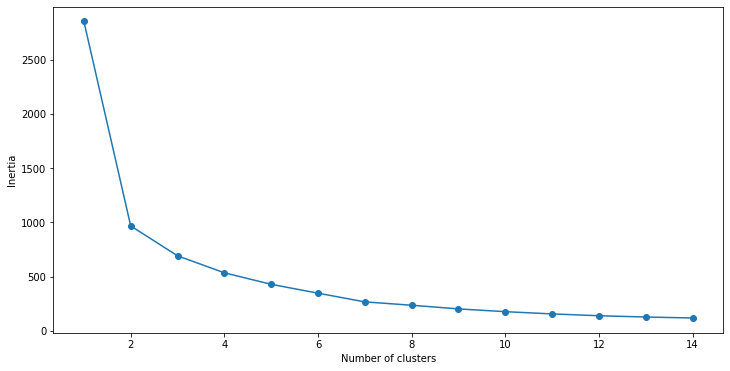

In [197]:
# segmentation model

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster,max_iter=200, init='k-means++',random_state=44)
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [206]:
# building the model with 2 clusters
kmeans = KMeans( n_clusters = 7, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=7)

In [200]:
# # evaluation of the segmentation model
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import davies_bouldin_score
# from sklearn.metrics import calinski_harabasz_score


# print('inertia : ',kmeans.inertia_)
# print('silhouette_score : ',silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))
# print('davies_bouldin_index : ', davies_bouldin_score(scaled_features, kmeans.labels_))
# print('calinski_harabasz_inces : ', calinski_harabasz_score(scaled_features, kmeans.labels_))

inertia :  346.620449200685
silhouette_score :  0.45710435116008113
davies_bouldin_index :  0.7852798314304916
calinski_harabasz_inces :  1366.641051309718


In [202]:
# # evaluation of the segmentation model
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import davies_bouldin_score
# from sklearn.metrics import calinski_harabasz_score


# print('inertia : ',kmeans.inertia_)
# print('silhouette_score : ',silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))
# print('davies_bouldin_index : ', davies_bouldin_score(scaled_features, kmeans.labels_))
# print('calinski_harabasz_inces : ', calinski_harabasz_score(scaled_features, kmeans.labels_))

inertia :  266.2141561111566
silhouette_score :  0.46620879626874817
davies_bouldin_index :  0.7434884775930496
calinski_harabasz_inces :  1528.797887324127


In [322]:
# segmentation model interpretation and visualization

pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(final_outlet_data[['Outlet_ID','area(sqft)','total_volume','total_earning']])
frame['cluster'] = pred
frame

,Outlet_ID,area(sqft),total_volume,total_earning,cluster
0,ID7203,5660,6949.2,3492920.0,0
1,ID1878,4138,7208.0,3606340.0,0
2,ID1740,5546,7517.4,3755910.0,0
3,ID4366,5134,8060.8,4060130.0,0
4,ID8358,4100,7875.6,3918700.0,0
...,...,...,...,...,...
946,ID4119,3858,7693.0,5631520.0,0
947,ID2978,3495,8061.4,5942690.0,0
948,ID6549,1141,8826.0,6409630.0,4
949,ID1210,3322,8526.8,6072600.0,4


In [321]:
my_report = sv.analyze(avg_df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


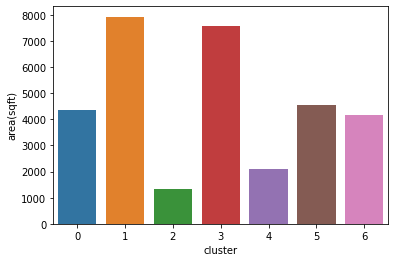

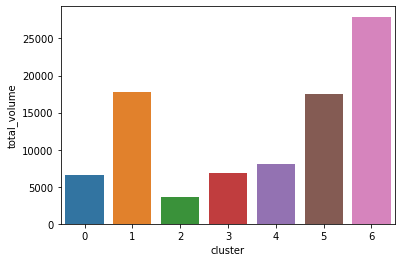

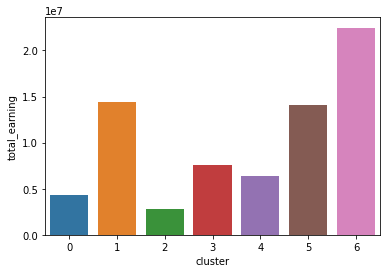

In [223]:
# visualize data
list1 = col_names
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()


In [224]:
avg_df

,cluster,area(sqft),total_volume,total_earning
0,0,4364.543726,6629.948289,4.306242e+06
1,1,7922.915033,17723.005229,1.440257e+07
2,2,1338.777778,3638.340741,2.762696e+06
3,3,7548.754386,6821.210526,7.574547e+06
4,4,2108.413613,8034.869110,6.407350e+06
5,5,4555.213235,17520.792647,1.407688e+07
6,6,4146.875000,27938.125000,2.246233e+07


In [258]:
# recommend a most suitable freezer

freezer_data

,Freezer_Name,Model_Number,Volume_Capacity,Cost
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [309]:
# ROI and sales ratio
roi_lst_lst=[]
sales_ratio_lst_lst = []
i=0
for cluster_id in avg_df['cluster'].unique():
    roi_lst=[]
    sales_ratio_lst = []
    j=0
    # print(cluster_id,end=' ')
    for freezer in freezer_data['Model_Number'].unique():
        a = (avg_df.loc[avg_df.cluster==cluster_id]['total_earning'])
        b = (freezer_data.loc[freezer_data.Model_Number==freezer]['Cost'])
        c = (avg_df.loc[avg_df.cluster==cluster_id]['total_volume'])
        b = (freezer_data.loc[freezer_data.Model_Number==freezer]['Volume_Capacity'])
        # print(a,b)
        roi = a[i]/b[j]/12
        sales_ratio = c[i]/b[j]/12
        # print(freezer,roi,end=',')
        roi_lst.append(roi)
        sales_ratio_lst.append(sales_ratio)
        j+=1
    roi_lst_lst.append(roi_lst)
    sales_ratio_lst_lst.append(sales_ratio_lst)
    i+=1
    # print(end='\n')

In [318]:
for i in roi_lst_lst:
    print(i)
    print(max(i),i.index(max(i))+1)

[6524.609747666782, 4784.71381495564, 2990.4461343472753, 11961.784537389101, 2392.35690747782, 5520.823632641123, 3588.5353612167305, 14354.141444866922, 4485.669201520913, 1794.2676806083653]
14354.141444866922 8
[21822.07239057239, 16002.853086419753, 10001.783179012345, 40007.13271604938, 8001.426543209876, 18464.830484330483, 12002.139814814815, 48008.55925925926, 15002.674768518518, 6001.069907407407]
48008.55925925926 8
[4185.902693602694, 3069.661975308642, 1918.5387345679012, 7674.154938271605, 1534.830987654321, 3541.9176638176637, 2302.2464814814816, 9208.985925925926, 2877.808101851852, 1151.1232407407408]
9208.985925925926 8
[11476.58692185008, 8416.163742690058, 5260.102339181286, 21040.409356725144, 4208.081871345029, 9710.958164642374, 6312.122807017543, 25248.491228070172, 7890.15350877193, 3156.0614035087715]
25248.491228070172 8
[9708.106298587974, 7119.277952297848, 4449.548720186155, 17798.19488074462, 3559.638976148924, 8214.551483420593, 5339.458464223385, 21357.

In [319]:
for i in sales_ratio_lst_lst:
    print(i)
    print(max(i),i.index(max(i))+1)

[10.045376195414217, 7.366609209970426, 4.604130756231516, 18.416523024926065, 3.683304604985213, 8.499933703812031, 5.5249569074778195, 22.099827629911278, 6.906196134347275, 2.7624784537389098]
22.099827629911278 8
[26.85303822539117, 19.692228031953523, 12.307642519970953, 49.23057007988381, 9.846114015976761, 22.72180157533099, 14.769171023965143, 59.07668409586057, 18.46146377995643, 7.384585511982571]
59.07668409586057 8
[5.51263748597082, 4.042600823045268, 2.526625514403292, 10.106502057613168, 2.021300411522634, 4.664539411206078, 3.0319506172839508, 12.127802469135803, 3.7899382716049383, 1.5159753086419754]
12.127802469135803 8
[10.335167464114832, 7.579122807017543, 4.736951754385965, 18.94780701754386, 3.7895614035087717, 8.745141700404858, 5.684342105263158, 22.737368421052633, 7.105427631578947, 2.842171052631579]
22.737368421052633 8
[12.174044105981283, 8.927632344386273, 5.579770215241421, 22.319080860965684, 4.463816172193137, 10.301114243522624, 6.695724258289705, 2